<a href="https://colab.research.google.com/github/tanaz123/tanazmoghadamfar-/blob/master/Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXERCISE: CLUSTERING & PCA

# Tanaz Moghadamfar


First I download my datas from kaggle about the people salary depnds on their experiences . salary and years of experience of 35 jobholders.  I will try to show the relationship between salary and years of experience. and then I saved them in my google drive and here I'm going to read them from my drive

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Here by using the pandas library I call my document and with head of the salary I want to define the firt 5 and with the tail I can show the last 5 datas

In [ ]:
import pandas as pd 
sal = pd.read_csv('/content/gdrive/My Drive/Salary.csv') 
sal.head() 


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
sal.tail()

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


By this code I can show the number of raws and colums

In [ ]:
sal.shape

(35, 2)

I look if I have missing data to make sure there are not missing datas



In [ ]:
sal.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


As the number of count for both of them are same and equal to 35.000000 so there are no missing data

Here I'm usuing another library is named as a seaborn to draw our graph 

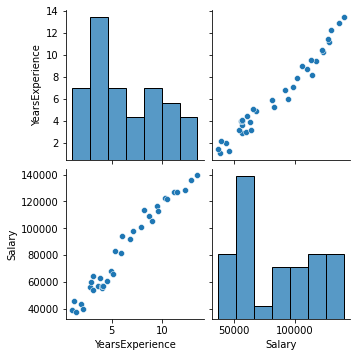

In [ ]:
import seaborn as sns 
g = sns.pairplot(sal)

From the scatter plot in above we can underestand that the more they were worked the more salary they had

Performing the Kmeans method on data.

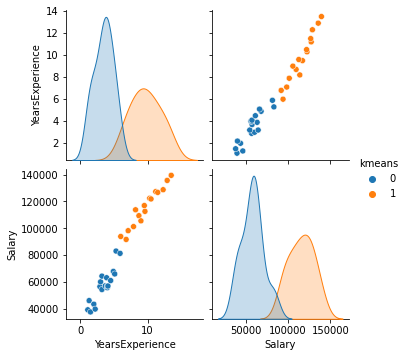

In [ ]:
from sklearn.cluster import KMeans 

group = KMeans(n_clusters=2).fit_predict(sal)

sal_grouped = sal
sal_grouped['kmeans'] = group
g = sns.pairplot(sal_grouped, hue="kmeans")

In [ ]:
X=sal.values

In [ ]:
sal.columns

Index(['YearsExperience', 'Salary', 'kmeans'], dtype='object')

Normalizing the data:

In [ ]:
from sklearn.preprocessing import StandardScaler 
XS = StandardScaler().fit_transform(X) 
XS.shape

(35, 3)

We want to how many components should be kept in order to explain 90% of the variability

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3).fit(XS) 

In [ ]:
Xpj = pca.transform(XS)
Xpj.shape

(35, 3)

In [ ]:
print('eigenvalues = {} {} {}'.format(*pca.explained_variance_))
print('Explained variance = {} {} {}'.format(*pca.explained_variance_ratio_))

eigenvalues = 2.9254265603554592 0.1492941190369692 0.01351461472521749
Explained variance = 0.9472809814484346 0.04834285759292337 0.004376160958641855


In [ ]:
150*pca.explained_variance_ratio_.cumsum()

array([142.09214722, 149.34357586, 150.        ])

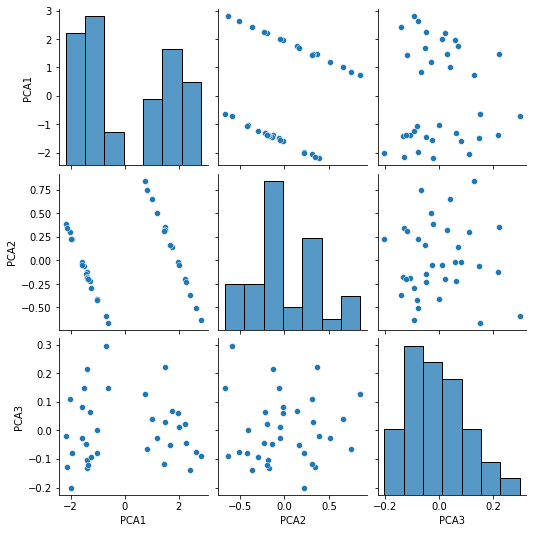

In [ ]:
import matplotlib.pyplot as plt
ndim_reducida = 10

XPCA = Xproj[:,0:ndim_reducida]

d = pd.DataFrame(XPCA,columns=['PCA1','PCA2','PCA3'])
sns.pairplot(d)
plt.show()

 Different clustering methods (k-means, hierarchical and GMM + BIC model selection)


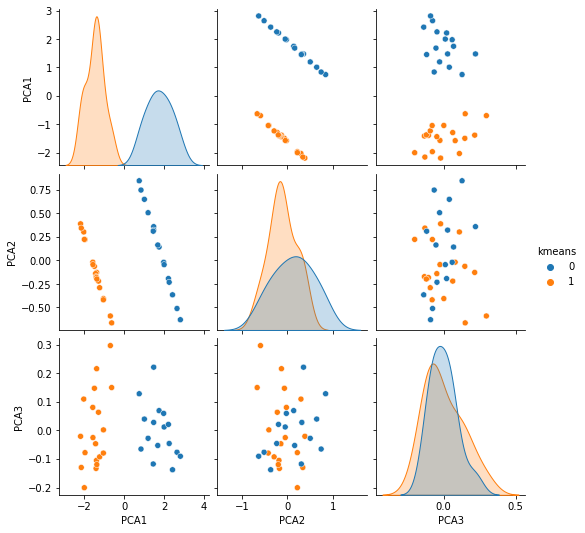

In [ ]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=2).fit_predict(d)

d_grouped = d
d_grouped['kmeans'] = group
g = sns.pairplot(d_grouped, hue="kmeans")

Agglomerative hierarchical clustering for two clusters data

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2).fit(d) 
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

We are going to see hw they are grouped together:


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b'],
 'dcoord': [[0.0, 0.22265240239592418, 0.22265240239592418, 0.0],
  [0.0, 0.2348166778046561, 0.2348166778046561, 0.22265240239592418],
  [0.0, 0.24381117962800516, 0.24381117962800516, 0.2348166778046561],
  [0.0, 0.13956520809333867, 0.13956520809333867, 0.0],
  [0.0, 0.14770977479359143, 0.14770977479359143, 0.0],
  [0.0, 0.19685952343446997, 0.19685952343446997, 0.14770977479359143],
  [0.13956520809333867,
   0.2718343681412293,
   0.2718343681412293,
   0.19685952343446997],
  [0.0, 0.206387323251398, 0.206387323251398, 0.0],
  [0.0, 0.05841792480664365, 0.05841792480664365, 0.0],
  [0.0, 0.08614284148239193, 0.08614284148239193, 0.0],
  [0.0, 0.23308817592222927, 0.23308817592222927, 0.08614284148239193],
  [0.05841792480664365,
 

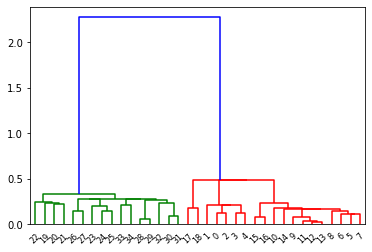

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(d)
dendrogram(Z) 

GMM+BIC model


[913.0163222052477]
[913.0163222052477, 505.73608365330756]
[913.0163222052477, 505.73608365330756, 514.1151588516642]
[913.0163222052477, 505.73608365330756, 514.1151588516642, 520.4934977843221]
[913.0163222052477, 505.73608365330756, 514.1151588516642, 520.4934977843221, 532.8545124479509]
[913.0163222052477, 505.73608365330756, 514.1151588516642, 520.4934977843221, 532.8545124479509, 538.2027631781406]
GMM model G = 2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 720x432 with 0 Axes>

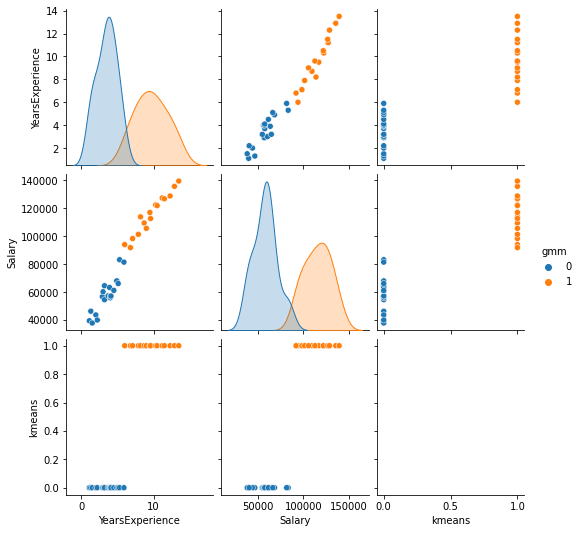

In [ ]:
import numpy as np
from sklearn import mixture 
NMAX = 6 
bic = [] 
for kG in np.arange(1,NMAX+1): 
    GMMsal = mixture.GaussianMixture(n_components=kG,covariance_type='tied').fit(X) 
    bic.append(GMMsal.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('GMM model G = {}'.format(idx_winner+1)) 

GMMsal = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='tied').fit(X)

fig = plt.figure(figsize=(10,6))
y_pred_GMMsal = GMMsal.fit_predict(X) 

sal_grouped = sal
sal_grouped['gmm'] = y_pred_GMMsal

j = sns.pairplot(sal, hue='gmm') 


We can coclude that if we look at the graphs and whole datas the people's experiences and the years that they've been working in some companies have effect on their salary , and we can have an ascending linear graph but if want to devide the years like 1 to 10 and the other morethan 10 we can see some exception that there were some people with less experience that they were earning high salaries and vice versa but these differences are less in the exprienced propleand clearly we can observe that the whole datas are divided in 2 clusters that are shown in two differen colors of orange and blue.